# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

# Overview and Table of Content

The notebook will implement this workflow:

1. [Prepare jupyter lab notebook environment](#Prepare-jupyter-lab-notebook-environment)
1. [Download Data](#Download-Data)
1. [Data exploration and cleaning](#Data-exploration-and-cleaning)
    1. [Load data from S3](##Load-data-from-S3)
    1. explore the data
    1. [Class Cleaner](#Class-Cleaner)
    1. [Data Cleaning- (handling null and empty values, unknown values, encode categorical values)](#Data-Cleaning) 
    1. [Feature Engineering](#Feature-Engineering)    
1. [Data preparation and transformation](#Data-preparation-and-transformation)
    1. Feature engineering (PCA)
1. [Model development and training](Model-development-and-training)
    1. Develop a model
    1. Train a model
    1. Model validation and evaluation
    1. Hyperparameters tuning
    1. Select the best performing model based on the test results
1. [Deploy model](#Deploy-Model)

# Prepare jupyter lab notebook environment
---


In [166]:
!python --version

Python 3.7.11


## Update Conda Packages

In [12]:
!conda update -y --force-reinstall conda



         See 'conda update --help' for details about the --force-reinstall
         and --clobber flags.


Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda-client==1.7.2=py37_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/linux-64::astropy==4.0=py37h7b6447c_0
  - conda-forge/noarch::autovizwidget==0.19.0=pyh6c4a22f_0
  - defaults/linux-64::bokeh==1.4.0=py37_0
  - conda-forge/linux-64::conda==4.10.3=py37h89c1867_0
  - defaults/noarch::dask==2.11.0=py_0
  - defaults/linux-64::distributed==2.11.0=py37_0
  - defaults/noarch::flask==1.1.1=py_0
  - conda-forge/noarch::hdijupyterutils==0.19.0=pyh6c4a22f_0
  - defaults/linux-64::imageio==2.6.1=py37_0
  - defaults/linux-64::ipykernel==5.1.4=py37h39e3cac_0
  - defaults/noarch::ipywidgets==7.5.1=py_0
  - defaults/linux-64::jupyter==1.0.0=py37_7
  - defaults/linux-64::jupyter_client==5.3.4=py37_

In [5]:
! conda update -y conda

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda-client==1.7.2=py37_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/linux-64::astropy==4.0=py37h7b6447c_0
  - conda-forge/noarch::autovizwidget==0.19.0=pyh6c4a22f_0
  - defaults/linux-64::bokeh==1.4.0=py37_0
  - conda-forge/linux-64::conda==4.10.3=py37h89c1867_0
  - defaults/noarch::dask==2.11.0=py_0
  - defaults/linux-64::distributed==2.11.0=py37_0
  - defaults/noarch::flask==1.1.1=py_0
  - conda-forge/noarch::hdijupyterutils==0.19.0=pyh6c4a22f_0
  - defaults/linux-64::imageio==2.6.1=py37_0
  - defaults/linux-64::ipykernel==5.1.4=py37h39e3cac_0
  - defaults/noarch::ipywidgets==7.5.1=py_0
  - defaults/linux-64::jupyter==1.0.0=py37_7
  - defaults/linux-64::jupyter_client==5.3.4=py37_0
  - defaults/noarch::jupyter_console==6.1.0=py_0
  - defaults/noarch::jupyterlab==1.2.6=pyhf63ae98_0
  - de

In [13]:
! conda update --force-reinstall --all -y

[autoreload of six failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 287, in update_class
    old_obj = getattr(old, key)
  File "/opt/conda/lib/python3.7/site-packages/six.py", line 93, in __get__
    setattr(obj, self.name, result)  # Invokes __set__.
AttributeError: 'NoneType' object has no attribute 'cStringIO'
]




         See 'conda update --help' for details about the --force-reinstall
         and --clobber flags.


Solving environment: | 
  - defaults/linux-64::six-1.15.0-py37h06a4308_0, defaults/linux-64::tenacity-8.0.0-py37h06a4308_0, defaults/noarch::plotly-5.1.0-pyhd3eb1b0_0
  - defaults/linux-64::plotly-3.6.1-py37_0, defaults/linux-64::retrying-1.3.3-py37_2, defaults/noarch::six-1.16.0-pyhd3eb1b0done

## Package Plan ##

  environment location: /opt/conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-client-1.8.0      |   py37h06a4308_0         150 KB
    anaconda-project-0.10.1    |     pyhd3eb1b0_0         218 KB
    anyio-2.2.0                |   py37h06a4308_1         123 KB
    astropy-4.3.1              |   py37h09021b7_0         6.3 MB
    async_generator-1.10       |   py37h28b3542_0          39 KB
    autovizwidget-0.18.0       |     pyhd3eb1b0_0          14 KB
   

In [10]:
! conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
aiobotocore               1.3.3                    pypi_0    pypi
aiohttp                   3.7.4.post0              pypi_0    pypi
aioitertools              0.7.1                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda-client           1.8.0            py37h06a4308_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py37h06a4308_1  
appdirs                   1.4.4                      py_0  
argh                      0.26.2                   py37_0  
argon2-cffi               20.1.0           py37h27cfd23_1  
arrow-cpp                 4.0.1            py37hced866c_3  
asn1crypto                1.4.0                      py_0  
astroid                   2.6.4 

In [3]:
! conda install -y pyarrow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pyarrow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arrow-cpp-4.0.1            |   py37hced866c_3         7.0 MB
    aws-c-common-0.4.57        |       he6710b0_1         156 KB
    aws-c-event-stream-0.1.6   |       h2531618_5          25 KB
    aws-checksums-0.1.9        |       he6710b0_0          49 KB
    aws-sdk-cpp-1.8.185        |       hce553d0_0         1.9 MB
    boost-cpp-1.73.0           |      h27cfd23_11          25 KB
    libboost-1.73.0            |      h3ff78a5_11        13.9 MB
    libthrift-0.13.0           |       hfb8234f_6         2.5 MB
    orc-1.6.7      

In [ ]:
! conda install -y -c anaconda progressbar2

In [ ]:
! conda list

## Auto Reload Modules 
configure auto-reload of modules when they have been changed - this simplifies developing and testing

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

## Imports and global configs

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s##ns
#import progressbar

# magic word for producing visualizations in notebook
%matplotlib inline

In [12]:
# display the N columns and rows
pd.set_option('display.max_columns', 50)

pd.set_option('display.max_rows', 100)

## Activate intelex for scikit
see [activate intelex for scikit](https://intel.github.io/scikit-learn-intelex/index.html)

In [13]:
#! conda install -y scikit-learn-intelex

# Download Data
---
The four data sets
- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).
    
and two files of description    
- `DIAS Attributes - Values 2017.xlsx`
- `DIAS Information Levels - Attributes 2017.xlsx`

can be downloaded from the Udacity project workspace.

# Data exploration and cleaning
---

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

## Load Data from S3
The load script assumes that the downloaded data has been transferred to S3.

The data load of the AZDIAS data set takes more than a minute the CUSTOMERS data set should be loaded in less than 20 secs


In [71]:
import os
if os.path.exists('data') and os.path.isdir('data'):
    prefix = './data'
else:
    prefix = 's3://sagemaker-eu-central-1-292575554790/dsnd_arvato'

In [72]:
! aws s3 ls s3://sagemaker-eu-central-1-292575554790/dsnd_arvato/

2021-08-26 12:23:24          0 
2021-08-26 12:23:57      79449 DIAS Attributes - Values 2017.xlsx
2021-08-26 12:23:57      32798 DIAS Information Levels - Attributes 2017.xlsx
2021-08-26 12:23:56  681624835 Udacity_AZDIAS_052018.csv
2021-08-26 12:23:56  144487786 Udacity_CUSTOMERS_052018.csv
2021-08-26 12:23:56   31968574 Udacity_MAILOUT_052018_TEST.csv
2021-08-26 12:23:56   32122983 Udacity_MAILOUT_052018_TRAIN.csv


In [73]:
%%time
df_azdias = pd.read_csv(f'{prefix}/Udacity_AZDIAS_052018.csv', sep=';', index_col='LNR')
# load in the data
#azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/conda/lib/python3.7/site-packages/IPython/core/magics/execution.py:1321: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 25.9 s, sys: 4.75 s, total: 30.6 s
Wall time: 1min 2s


In [74]:
%%time
df_customers = pd.read_csv(f'{prefix}/Udacity_CUSTOMERS_052018.csv', sep=';', index_col='LNR')

CPU times: user 5.44 s, sys: 387 ms, total: 5.82 s
Wall time: 12.1 s


In [75]:
df_azdias.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
910220,-1,9.00000,0.00000,NaN,NaN,NaN,NaN,21.00000,11.00000,0.00000,...,4.00000,8.00000,11.00000,10.00000,3.00000,9.00000,4.00000,5,2,1
910225,-1,9.00000,17.00000,NaN,NaN,NaN,NaN,17.00000,10.00000,0.00000,...,2.00000,9.00000,9.00000,6.00000,3.00000,9.00000,2.00000,5,2,3
910226,2,1.00000,13.00000,NaN,NaN,NaN,NaN,13.00000,1.00000,0.00000,...,0.00000,7.00000,10.00000,11.00000,NaN,9.00000,7.00000,3,2,4
910241,-1,1.00000,20.00000,NaN,NaN,NaN,NaN,14.00000,3.00000,0.00000,...,2.00000,3.00000,5.00000,4.00000,2.00000,9.00000,3.00000,4,1,3


In [76]:
df_azdias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 365 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(92), object(6)
memory usage: 2.4+ GB


In [77]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191652 entries, 9626 to 148883
Columns: 368 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(8)
memory usage: 539.5+ MB


## Checks 


### Data errors during load
during the load process we got two error messages for columns 18 and 19. I will check this here

In [78]:
# column 18 has 0-based index 17
df_azdias.iloc[:,17].unique()

array([nan, 8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7',
       '2', '8', '9', '6', '5', '1', 'X'], dtype=object)

In [79]:
# column 19 has 0-based index 18
df_customers.iloc[:,18].unique()

array([13.0, nan, 34.0, 24.0, 41.0, 23.0, 15.0, 55.0, 14.0, 22.0, 43.0,
       51.0, 33.0, 25.0, 44.0, 54.0, 32.0, 12.0, 35.0, 31.0, 45.0, 52.0,
       '45', '25', '55', '51', '14', '54', '43', '22', '15', '24', '35',
       '23', '12', '44', '41', '52', '31', '13', '34', '32', '33', 'XX'],
      dtype=object)

In [80]:
df_azdias.columns[17:19]

Index(['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'], dtype='object')


**Result:** The errors is caused by string values "X" and "XX" in the datasets in columns CAMEO_DEUG_2015 and CAMEO_INTL_2015.

I will add some code to the Data Cleaner class to handle this


### check for duplicates
check if dataset contains duplicate records based on column ID LNR

In [81]:
df_azdias.index.duplicated().sum()

0

In [82]:
df_customers.index.duplicated().sum()

0

## Loading & Explore Metadata

### Load Metadata

In [83]:
df_metadata = pd.read_excel(f'{prefix}/DIAS Attributes - Values 2017.xlsx', usecols='B:E', dtype='str', header=1).fillna(method='ffill')
df_metadata.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly


### Explore Metadata

1. check nulls
2. check unkown values

In [84]:
df_metadata.isnull().sum()

Attribute      0
Description    0
Value          0
Meaning        0
dtype: int64

In [85]:
f"Number of unique attributes: {df_metadata['Attribute'].unique().shape[0]}"

'Number of unique attributes: 314'

In [86]:
f"Number of Attributes that can be unnkown value: {df_metadata['Meaning'].str.contains('unknown').sum()}"

'Number of Attributes that can be unnkown value: 233'

In [87]:
f"Number of Attributes that can be `no transaction known` value: {df_metadata['Meaning'].str.contains('no transaction.? known', regex=True).sum()}"

'Number of Attributes that can be `no transaction known` value: 56'

In [88]:
f"Total: {df_metadata['Meaning'].str.contains('unknown').sum() + df_metadata['Meaning'].str.contains('no transaction.? known', regex=True).sum()}"

'Total: 289'

### Compare dataset features (columns)

In [89]:
# columns that customers dataset contain but azidas not
set(df_customers.columns) - set(df_azdias.columns)

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

In [90]:
# columns that azdias dataset contain but customers not
set(df_azdias.columns) - set(df_customers.columns)

set()

**Result**: `CUSTOMERS` dataset has 3 more columns {'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

### Metadata Columns compared to Dataset columns

check for which columns of the dataset a metadata description exists

In [91]:
df_metadata_cols = df_metadata['Attribute'].copy()
# some columns of the metadata ends on _RZ whereas the datasets have the same columns whcih do not end on _RZ
# therefore we replace this
df_metadata_cols = df_metadata_cols.str.replace('_RZ','')

diff_set = set(df_azdias.columns) - set(df_metadata_cols)
print(f'number of cols in AZDIAS dataset but not described in Metadata: {len(diff_set)}')
pd.Series(list(diff_set)).sort_values().unique()

number of cols in AZDIAS dataset but not described in Metadata: 60


array(['AKT_DAT_KL', 'ALTERSKATEGORIE_FEIN', 'ALTER_KIND1', 'ALTER_KIND2',
       'ALTER_KIND3', 'ALTER_KIND4', 'ANZ_KINDER',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ARBEIT', 'CAMEO_INTL_2015',
       'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3',
       'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'D19_BUCH_CD',
       'D19_KONSUMTYP_MAX', 'D19_LETZTER_KAUF_BRANCHE', 'D19_SOZIALES',
       'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_DATUM',
       'D19_VERSI_OFFLINE_DATUM', 'D19_VERSI_ONLINE_DATUM',
       'D19_VERSI_ONLINE_QUOTE_12', 'DSL_FLAG', 'EINGEFUEGT_AM',
       'EINGEZOGENAM_HH_JAHR', 'EXTSEL992', 'FIRMENDICHTE', 'GEMEINDETYP',
       'HH_DELTA_FLAG', 'KBA13_ANTG1', 'KBA13_ANTG2', 'KBA13_ANTG3',
       'KBA13_ANTG4', 'KBA13_BAUMAX', 'KBA13_CCM_1401_2500', 'KBA13_GBZ',
       'KBA13_HHZ', 'KBA13_KMH_210', 'KK_KUNDENTYP', 'KOMBIALTER',
       'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN',
       'RT_UEBERGROESSE', 'SOHO_KZ', 'STRUKTURTYP', 'UMFELD_ALT',
   

In [92]:
diff_set2 = set(df_metadata_cols) - set(df_azdias.columns)
print(f'number of cols in Metadata but not in AZDIAS dataset: {len(diff_set2)}')
diff_set2

number of cols in Metadata but not in AZDIAS dataset: 9


{'BIP_FLAG',
 'CAMEO_DEUINTL_2015',
 'D19_BUCH',
 'D19_KK_KUNDENTYP',
 'GEOSCORE_KLS7',
 'HAUSHALTSSTRUKTUR',
 'KBA13_CCM_1400_2500',
 'SOHO_FLAG',
 'WACHSTUMSGEBIET_NB'}

In [93]:
df_azdias[list(diff_set)].head()

,KK_KUNDENTYP,CJT_KATALOGNUTZER,EINGEZOGENAM_HH_JAHR,CJT_TYP_2,CJT_TYP_1,RT_SCHNAEPPCHEN,RT_UEBERGROESSE,STRUKTURTYP,ALTER_KIND4,D19_SOZIALES,...,ALTER_KIND3,KONSUMZELLE,D19_LETZTER_KAUF_BRANCHE,VK_DISTANZ,D19_VERSI_DATUM,CAMEO_INTL_2015,D19_BUCH_CD,ANZ_STATISTISCHE_HAUSHALTE,D19_VERSI_OFFLINE_DATUM,VERDICHTUNGSRAUM
LNR,,,,,,,,,,,,,,,,,,,,,
910215,NaN,5.00000,NaN,1.00000,1.00000,4.00000,1.00000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10,NaN,0,NaN,10,NaN
910220,NaN,1.00000,2004.00000,5.00000,5.00000,3.00000,5.00000,2.00000,NaN,NaN,...,NaN,1.00000,NaN,11.00000,10,51.00000,0,12.00000,10,0.00000
910225,NaN,2.00000,2000.00000,4.00000,4.00000,4.00000,5.00000,3.00000,NaN,0.00000,...,NaN,0.00000,D19_UNBEKANNT,9.00000,10,24.00000,0,7.00000,10,1.00000
910226,NaN,3.00000,1998.00000,2.00000,2.00000,2.00000,3.00000,1.00000,NaN,0.00000,...,NaN,0.00000,D19_UNBEKANNT,10.00000,10,12.00000,6,2.00000,10,0.00000
910241,1.00000,3.00000,2004.00000,3.00000,3.00000,5.00000,5.00000,3.00000,NaN,0.00000,...,NaN,0.00000,D19_SCHUHE,5.00000,2,43.00000,6,3.00000,7,1.00000


### Extract `Kinder` information and build new feature
we use the ANZ_KINDER and ALTER_KIND(n) columns to derive the number of children <10 and >= 10

number of records with more than 4 children: 252 of 891,221 (0.02828 %)
number of records with at least one child: 86480 of 891,221 (9.70354 %)
number of records with ANZ_KINDER >= 5 and ALTER_KIND4 < 10: 9

--------------------------------------------------------------------------------


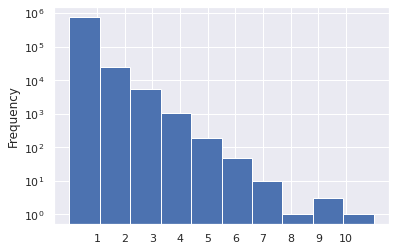

In [125]:
num_moreThan4Children = df_azdias[df_azdias['ANZ_KINDER']>4].shape[0]
num_withChildren = df_azdias[df_azdias['ANZ_KINDER']>0].shape[0]
df_children5plus = df_azdias[(df_azdias['ANZ_KINDER']>4) & (df_azdias['ALTER_KIND4']<10)].filter(regex='(ANZ_KINDER)|(ALTER_KIND.?)')

print(f'number of records with more than 4 children: {num_moreThan4Children} of {df_azdias.shape[0]:,.0f} ({(num_moreThan4Children / df_azdias.shape[0] *100):6.5f} %)')
print(f'number of records with at least one child: {num_withChildren} of {df_azdias.shape[0]:,.0f} ({(num_withChildren / df_azdias.shape[0] *100):6.5f} %)')
print(f'number of records with ANZ_KINDER >= 5 and ALTER_KIND4 < 10: {df_children5plus.shape[0]}\n')
print('-'*80)

ax = df_azdias['ANZ_KINDER'].plot.hist()
ax.set_yscale('log')
ax.set_xticks(np.arange(10)+1)
plt.show()

In [127]:
 df_azdias['ANZ_KINDER'].value_counts()

0.00000     731242
1.00000      55350
2.00000      24445
3.00000       5376
4.00000       1057
5.00000        190
6.00000         47
7.00000         10
9.00000          3
11.00000         1
8.00000          1
Name: ANZ_KINDER, dtype: int64

**Result** The query above shows that there just 9 records with more or equal than 5 children and an age of child4 (`ALTER_KIND4`) < 10. In addition the `ALTER_KIND` column values are ordered so we can assume that the age of child5 and higher is >= 10

number of records with more than 4 children: 54 of 191,652 (0.02818 %)
number of records with at least one child: 12772 of 191,652 (6.66416 %)
number of records with ANZ_KINDER >= 5 and ALTER_KIND4 < 10: 2

--------------------------------------------------------------------------------


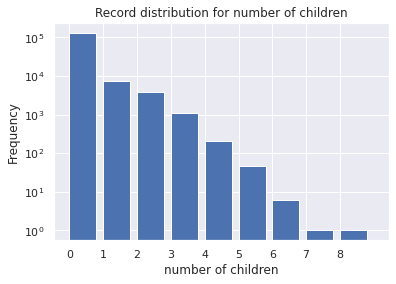

In [100]:
num_moreThan4Children = df_customers[df_customers['ANZ_KINDER']>4].shape[0]
num_withChildren = df_customers[df_customers['ANZ_KINDER']>0].shape[0]
df_children5plus = df_customers[(df_customers['ANZ_KINDER']>4) & (df_customers['ALTER_KIND4']<10)].filter(regex='(ANZ_KINDER)|(ALTER_KIND.?)')

print(f'number of records with more than 4 children: {num_moreThan4Children} of {df_customers.shape[0]:,.0f} ({(num_moreThan4Children / df_customers.shape[0] *100):6.5f} %)')
print(f'number of records with at least one child: {num_withChildren} of {df_customers.shape[0]:,.0f} ({(num_withChildren / df_customers.shape[0] *100):6.5f} %)')
print(f'number of records with ANZ_KINDER >= 5 and ALTER_KIND4 < 10: {df_children5plus.shape[0]}\n')
print('-'*80)

max_children = int(df_customers['ANZ_KINDER'].max())
ax = df_customers['ANZ_KINDER'].plot.hist(bins=range(max_children+2), width=0.8)
#ax = df_customers['ANZ_KINDER'].plot.hist(width=0.8)
ax.set_yscale('log')
ax.set_xticks(range(0,max_children+1));
ax.set_title('Record distribution for number of children');
ax.set_xlabel('number of children');

### Metadata Summary

The value *"unkown"* will be treated like a missing value.

The value *"no transaction(s) known"* will be treated as if the customer has done no transaction


## Class Cleaner


The code for the ETL Pipeline is outsourced to python module ==> see python module etl.processor

In [128]:
import python.etl.processor as etlp

In [154]:
def print_null_dist (df, filename=None):
    fig, ax = plt.subplots(figsize=(8, 4))
    df_nulls = df.isnull().sum(axis=0) / df.shape[0]
    ax.hist(df_nulls, bins =10, alpha=0.5)
    ax_bis = ax.twinx()
    ax_bis.hist(df_nulls, bins =50, cumulative=True, density=True, histtype='step', color='red', alpha=0.8, label='cum_line')
    #ax_bis.hist(df_azdias_cleaned.isnull().sum(axis=0), bins =50, cumulative=-1, density=True, histtype='step', color='red', alpha=0.95)
    plt.title('Distributions of missing data before cleaning')
    ax.set_xlabel('# % of missing values (NaN)')
    ax.set_ylabel('Columns');
    ax_bis.set_ylabel('cumulative');
    ax_bis.hlines(xmin=0, xmax=df_nulls.max(), y=0.9, linestyles='dashed', color='grey', label='0.9')
    ax_bis.legend(bbox_to_anchor=(1.07, 1.0), loc='upper left');

    if filename:
        plt.savefig(filename)
    
    

## Data Cleaning


The `DataCleaner` class will handle the following:

* replace `unknown` values (represented by -1, 0, 9 see [Metadata Descriptions](#Loading-and-Explore-Metadata))
* handle the errors raised during the load
* handle categorical variables
* drop not needed columns

see sections below for details

In [155]:
TESTING = False
if TESTING:
    df_azdias_cleaned = df_azdias.iloc[:100,:].copy()
else:
    df_azdias_cleaned = df_azdias.copy()


In [156]:
df_azdias_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 365 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(92), object(6)
memory usage: 2.5+ GB


### Handle Unknown / Missing Data

The dataset contains a lot of unkown values. Many times these values are encoded by -1, 0 or 9 (see Metadata files). I replace all unkown values by np.NaN to use standard pandas function for imputinig and dropping.



In [157]:
df_azdias_cleaned.shape

(891221, 365)

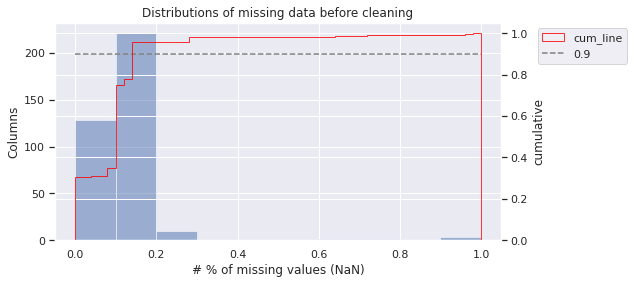

In [158]:
print_null_dist(df_azdias)

Most columns have less than 25% missing values. Some columns have more than 50% missing data. Let's find them

In [159]:
num_of_records = df_azdias_cleaned.shape[0]
s_missing_data = df_azdias_cleaned.isnull().sum(axis=0)
s_missing_data_pct = df_azdias_cleaned.isnull().sum(axis=0) / num_of_records 

df_missing_data = pd.DataFrame({'abs':s_missing_data,'pct':s_missing_data_pct})
df_missing_data.sort_values(by='pct', ascending=False)[:20]


,abs,pct
ALTER_KIND4,890016,0.99865
ALTER_KIND3,885051,0.99308
ALTER_KIND2,861722,0.96690
ALTER_KIND1,810163,0.90905
EXTSEL992,654153,0.73400
KK_KUNDENTYP,584612,0.65597
ALTERSKATEGORIE_FEIN,262947,0.29504
D19_LETZTER_KAUF_BRANCHE,257113,0.28850
D19_GESAMT_ONLINE_QUOTE_12,257113,0.28850
D19_SOZIALES,257113,0.28850


**Results**: 
* There 19 variables with more than 25% missing values -> These are candidates to drop
* There are some variables that have all the same number of missing data (257113 - D19_...).
* the variables `ALTER_KIND1` - `ALTER_KIND4` have a huge number of missing values. This is because they are dependent on `ANZ_KINDER` (number of children) so that for all records with `ANZ_KINDER`=0 the values for `ALTER_KIND1`- `ALTER_KIND4` are missing. We will handle this in feature engineering part and build a new varaible for these


**Note**: The drop operation will be the last part as columns maybe needed during the feature engineering process


In [138]:
drop_level = 0.25
columns_to_drop = s_missing_data_pct.sort_values(ascending=False)
columns_to_drop = columns_to_drop[columns_to_drop>drop_level].index
columns_to_drop

Index(['ALTER_KIND4', 'ALTER_KIND3', 'ALTER_KIND2', 'ALTER_KIND1', 'EXTSEL992',
       'KK_KUNDENTYP', 'ALTERSKATEGORIE_FEIN', 'D19_LETZTER_KAUF_BRANCHE',
       'D19_GESAMT_ONLINE_QUOTE_12', 'D19_SOZIALES', 'D19_LOTTO',
       'D19_KONSUMTYP', 'D19_VERSAND_ONLINE_QUOTE_12',
       'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12',
       'D19_BANKEN_ONLINE_QUOTE_12'],
      dtype='object')

### Inverstigate  columns that throw an error
Info: just a copy from above [Data error during load](#Data-errors-during-load)

In [139]:
df_azdias_cleaned['CAMEO_DEUG_2015'].unique()

array([nan, 8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7',
       '2', '8', '9', '6', '5', '1', 'X'], dtype=object)

Obviously the 'X' is causing the issue. I will replace this by np.NaN

In [140]:
df_azdias_cleaned['CAMEO_INTL_2015'].unique()

array([nan, 51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0,
       41.0, 34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0,
       '22', '24', '41', '12', '54', '51', '44', '35', '23', '25', '14',
       '34', '52', '55', '31', '32', '15', '13', '43', '33', '45', 'XX'],
      dtype=object)

Obviously the 'XX' is causing the issue. I will replace this by np.NaN

### Handle Categorical Values

The datasets have a huge number of categorical variables. Most of the categorical variables are already encoded by int and floats, e.g. `AGER_TYP` is encoded by

|value  | meaning |
|-----  |---------|
|-1     |	unknown |
|0	    | no classification possible |
|1	    | passive elderly |
|2	    | cultural elderly |
|3	    | experience-driven elderly |

We keep this encoding as in many cases the categorical values are Ordinal and just some nominal, e.g.

variable `D19_TELKO_ANZ_12` the values are ordered from `very low activity` to `very high activity`

|value  | meaning |
|-----  |---------|
|0      | no transactions known            |
|1      | very low activity                |
|2      | low activity                     |
|3      | slightly increased activity      |
|4      | increased activity               |
|5      | high activity                    |
|6      | very high activity               |


However, some columns are of type = object. These are now investigated.

In [141]:
df_azdias_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 365 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(92), object(6)
memory usage: 2.5+ GB


In [142]:
df_azdias_cleaned.select_dtypes(include='object').head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
LNR,,,,,,
910215,NaN,NaN,NaN,NaN,NaN,NaN
910220,8A,8.00000,51.00000,NaN,1992-02-10 00:00:00,W
910225,4C,4.00000,24.00000,D19_UNBEKANNT,1992-02-12 00:00:00,W
910226,2A,2.00000,12.00000,D19_UNBEKANNT,1997-04-21 00:00:00,W
910241,6B,6.00000,43.00000,D19_SCHUHE,1992-02-12 00:00:00,W


#### Results Categorical:

|variable   | type      | action    |
|--         |--         | ---   	|
|CAMEO_DEU_2015| nominal | replace by one hot encoding |
|D19_LETZTER_KAUF_BRANCHE | nominal | replace by one hot encoding |
| EINGEFUEGT_AM | date | drop - this is just the date when the record has been added |
| OST_WEST_KZ | nominal | replace by binary 0 and 1 |

`CAMEO_DEUG_2015` encoded categorical variable - contains invalid strings 'X'
`CAMEO_INTL_2015` encoded categorical variable - contains invalid strings 'XX'


In [143]:
pd.set_option('max_seq_items',450)
df_azdias_cleaned.columns

Index(['AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1', 'ALTER_KIND2',
       'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_PERSONEN',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ANZ_TITEL', 'ARBEIT', 'BALLRAUM',
       'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015', 'CJT_GESAMTTYP',
       'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4',
       'CJT_TYP_5', 'CJT_TYP_6', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24',
       'D19_BANKEN_DATUM', 'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS',
       'D19_BANKEN_LOKAL', 'D19_BANKEN_OFFLINE_DATUM',
       'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12',
       'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST',
       'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV',
       'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN',
       'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM',
       '

### Run the cleaning process

In [163]:
dfCleaner = etlp.PreDataCleaner(df_metadata)

df_azdias_cleaned = dfCleaner.transform(df_azdias_cleaned)
df_azdias_cleaned.shape

replace unkown values by NaNs: 
 233 of 233	Processed columnscolumns	Processed columns	Processed columns	Processed columns	Processed columns	Processed columns	Processed columns	Processed columns	Processed columns
fixing load errors {'CAMEO_DEUG_2015': 'X', 'CAMEO_INTL_2015': 'XX'}
fixed column CAMEO_DEUG_2015 - records fixed: 373
fixed column CAMEO_INTL_2015 - records fixed: 373
creating one hot encoding columns for: 
	CAMEO_DEU_2015
	D19_LETZTER_KAUF_BRANCHE
convert to binary: 
	column: OST_WEST_KZ - Mapping: {'W': 0, 'O': 1}
dropping columns: ['EINGEFUEGT_AM']


(891221, 440)

### Check distribution of Missing values again

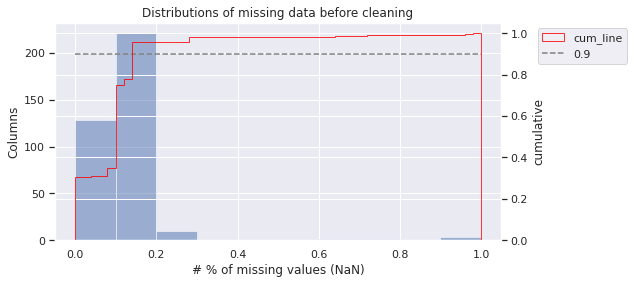

In [164]:
# Assess missing data in columns
print_null_dist(df_azdias, 'dist_of_missingdata_after_transformation.jpg')


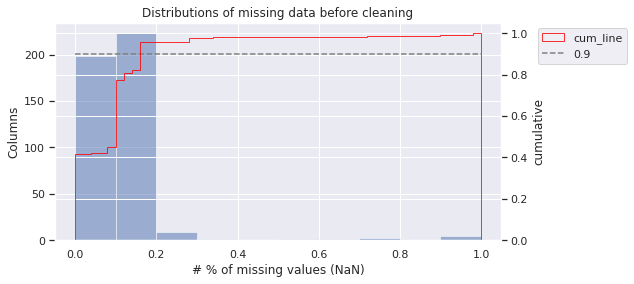

In [165]:
print_null_dist(df_azdias_cleaned, 'dist_of_missingdata_after_transformation.jpg')

### Comparison of distributions of missing data

![alt distribution-before-transformation](dist_of_missingdata_before_transformation.jpg )  
![alt distribution-after-transformation](dist_of_missingdata_after_transformation.jpg )

**Results**: 

* there is a significant increase of columns with no missing data  
This is because of the transformation of categorical features to one-hot encoded columns. Therfore the number of columns increased with no missing values.
* the other changes are becuse we replaced "unknown" values by np.NaN

## Save clenaed Datasets
Note: using feather requires to reset the index

In [54]:
df_azdias_cleaned.reset_index().to_feather('df_azdias_cleaned_step1-cleaned')

# Feature Engineering
Many records have ANZ_KINDER (number of children) = 0. 
For theses records the age of children columns (ALTER_KIND(N)) are always NaN. For records with a positive number 
of children the ALTER_KIND columns contains the age of children. We will replace these columns by summerize the
 them to two columns that will indicate the number of children younger than 10 and older or equal than 10.

In [55]:
df  = df_azdias_cleaned
cols_to_investigate = ['ALTER_KIND1','ALTER_KIND2','ALTER_KIND3','ALTER_KIND4','ANZ_KINDER']
df_kinder = df[cols_to_investigate]


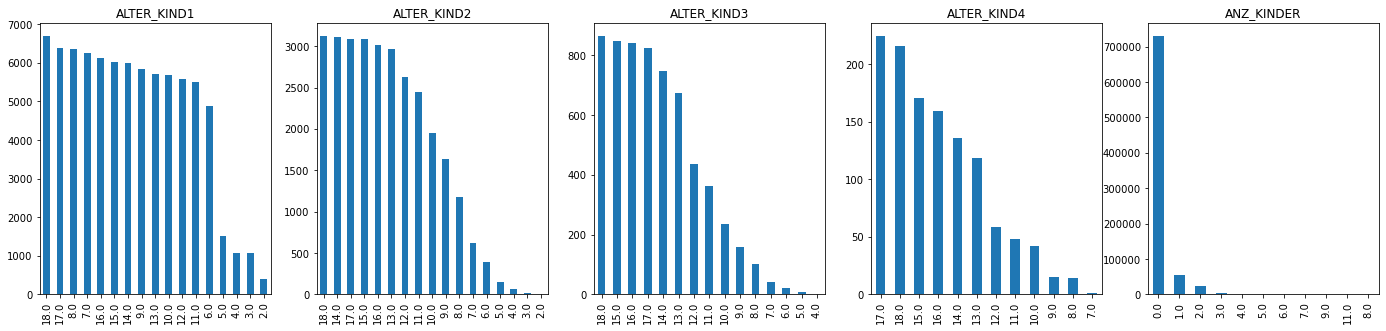

In [56]:
#df_kinder = df_azdias_cleaned.filter(regex='(ANZ_KINDER)|(ALTER_KIND.?)')

figure, ax_list = plt.subplots(1,5,figsize=(24,5))

for i, col in enumerate(cols_to_investigate):
    df_kinder[col].value_counts().plot(kind='bar',ax=ax_list[i], title=col)

**Results**: The majority has no children. The dataset is quite imbalanced. Even the age of children is havily imbalanced. As you can see in chart `ALTER_KIND1` the distribution of ages has much higher values for >5 than for <=5

Based on the observations above I will build a new feature `d_has_children` and `d_has_children_yte10` to indicate that person has children younger or equal than 10.

In [57]:
df_azdias_cleaned.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,...,D19_LETZTER_KAUF_BRANCHE_D19_DROGERIEARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_ENERGIE,D19_LETZTER_KAUF_BRANCHE_D19_FREIZEIT,D19_LETZTER_KAUF_BRANCHE_D19_GARTEN,D19_LETZTER_KAUF_BRANCHE_D19_HANDWERK,D19_LETZTER_KAUF_BRANCHE_D19_HAUS_DEKO,D19_LETZTER_KAUF_BRANCHE_D19_KINDERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_KOSMETIK,D19_LETZTER_KAUF_BRANCHE_D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE_D19_LOTTO,D19_LETZTER_KAUF_BRANCHE_D19_NAHRUNGSERGAENZUNG,D19_LETZTER_KAUF_BRANCHE_D19_RATGEBER,D19_LETZTER_KAUF_BRANCHE_D19_REISEN,D19_LETZTER_KAUF_BRANCHE_D19_SAMMELARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_SCHUHE,D19_LETZTER_KAUF_BRANCHE_D19_SONSTIGE,D19_LETZTER_KAUF_BRANCHE_D19_TECHNIK,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_MOBILE,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST
LNR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,1.0,1.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
910220,NaN,9.0,NaN,NaN,NaN,NaN,NaN,21.0,11.0,0.0,0.0,2.0,12.0,0.0,3.0,6.0,8.0,51.0,5.0,1.0,5.0,5.0,2.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
910225,NaN,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,0.0,0.0,1.0,7.0,0.0,3.0,2.0,4.0,24.0,3.0,2.0,4.0,4.0,1.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
910226,2.0,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,2.0,12.0,2.0,3.0,2.0,2.0,4.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
910241,NaN,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,0.0,0.0,4.0,3.0,0.0,4.0,2.0,6.0,43.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Run Feature Engineering Process

In [58]:
import python.etl.processor as etlp

featureBuilder = etlp.FeatureBuilder()
df_azdias_cleaned = featureBuilder.transform(df_azdias_cleaned)


In [59]:
df_azdias_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 442 entries, AGER_TYP to d_HAS_CHILDREN_YTE10
dtypes: float64(300), int64(142)
memory usage: 3.0 GB


## Save results
saving the results here will help to continue development and testing the next steps

**Info**: [Best way to save pandas Dataframe](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d)


In [60]:
df_azdias_cleaned.reset_index().to_feather('df_azdias_cleaned_step2-feaEngineered')

## Loading DF
you can start here if you want to skip steps before

In [ ]:
df_azdias_cleaned = pd.read_feather('df_azdias_cleaned_step2-feaEngineered')

# set the index as feather did store the index as column
df_azdias_cleaned.set_index('LNR', inplace=True)
df_azdias_cleaned.head()

# Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

## Cluster algorithms
For clustering there is number of popular algorithms. For the algorthim selection I focused on the ones that scikit-learn provides and on the article [clustering algorithms with python](https://machinelearningmastery.com/clustering-algorithms-with-python/).

## Feature Reduction and Selection

The dimension of the dataset is quite high (442 features) so that it is worth to consider a reduction of the dimensionality which will increase the performance and in many cases the accuracy of algorithm. In particular the popular K-means which I will use will profit from it.

See e.g. [PCA with k-means](https://365datascience.com/tutorials/python-tutorials/pca-k-means/)

## Approach 

1. **PCA - Principal Component Analysis**  
This algorithms is also provided by scikit-learn. It will transform the given space of features to new space with basis vectors that are linear combinations of the given features so that the new vectors point in direction of the maximum variance. For more information how to execute and interpret the values see [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
    1. **Impute missing data**
    1. **Standardize data**
    1. **Execute PCA**

1. **K-means** 


For the complete process I will use a sklearn pipeline to chain the steps

## Prepare the pipeline steps

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import progressbar

# magic word for producing visualizations in notebook
%matplotlib inline
sns.set_theme()

In [56]:
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



### Load Data
loads pre-processed data from a savepoint

In [57]:
X_train = pd.read_feather('df_azdias_cleaned_step2-feaEngineered')

# set the index as feather-format did store the index as column
X_train.set_index('LNR', inplace=True)
X_train.head()



,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_MOBILE,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,d_HAS_CHILDREN,d_HAS_CHILDREN_YTE10
LNR,,,,,,,,,,,,,,,,,,,,,
910215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
910220,NaN,9.00000,NaN,NaN,NaN,NaN,NaN,21.00000,11.00000,0.00000,...,0,0,0,0,0,0,0,0,0,0
910225,NaN,9.00000,17.00000,NaN,NaN,NaN,NaN,17.00000,10.00000,0.00000,...,0,0,0,1,0,0,0,0,0,0
910226,2.00000,1.00000,13.00000,NaN,NaN,NaN,NaN,13.00000,1.00000,0.00000,...,0,0,0,1,0,0,0,0,0,0
910241,NaN,1.00000,20.00000,NaN,NaN,NaN,NaN,14.00000,3.00000,0.00000,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 442 entries, AGER_TYP to d_HAS_CHILDREN_YTE10
dtypes: float64(300), int64(142)
memory usage: 2.9 GB


### Imputation

fill missing data with data

In [6]:
from sklearn.impute import SimpleImputer

col_names = X_train.columns
index = X_train.index

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [7]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,2.0,3.0,16.0,12.0,14.0,15.0,15.0,14.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,9.0,16.0,12.0,14.0,15.0,15.0,21.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,9.0,17.0,12.0,14.0,15.0,15.0,17.0,10.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,13.0,12.0,14.0,15.0,15.0,13.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,20.0,12.0,14.0,15.0,15.0,14.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891216,2.0,5.0,17.0,12.0,14.0,15.0,15.0,17.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
891217,2.0,9.0,16.0,12.0,14.0,15.0,15.0,16.0,11.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
891218,2.0,1.0,17.0,12.0,14.0,15.0,15.0,17.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
891219,2.0,9.0,16.0,17.0,14.0,15.0,15.0,20.0,7.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Standardization

An important preprocessing step for PCA is stanardization (scaling) of the features. See [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) for mor information

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [11]:
X_train = pd.DataFrame(imputer.fit_transform(X_train))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,0.200115,-0.371973,0.149547,0.018706,0.032972,0.015785,-0.001343,0.049442,-0.258584,-0.118316,...,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115
1,0.200115,1.338692,0.149547,0.018706,0.032972,0.015785,-0.001343,1.689818,0.212895,-0.118316,...,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115
2,0.200115,1.338692,0.473490,0.018706,0.032972,0.015785,-0.001343,0.752460,0.145541,-0.118316,...,-0.128365,-0.114193,-0.053861,1.887447,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115
3,0.200115,-0.942195,-0.822281,0.018706,0.032972,0.015785,-0.001343,-0.184898,-0.460647,-0.118316,...,-0.128365,-0.114193,-0.053861,1.887447,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115
4,0.200115,-0.942195,1.445318,0.018706,0.032972,0.015785,-0.001343,0.049442,-0.325938,-0.118316,...,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115


In [16]:
X_train.set_index(index, inplace=True)
X_train.columns = col_names
X_train.head()

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_MOBILE,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,d_HAS_CHILDREN,d_HAS_CHILDREN_YTE10
LNR,,,,,,,,,,,,,,,,,,,,,
910215,0.200115,-0.371973,0.149547,0.018706,0.032972,0.015785,-0.001343,0.049442,-0.258584,-0.118316,...,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115
910220,0.200115,1.338692,0.149547,0.018706,0.032972,0.015785,-0.001343,1.689818,0.212895,-0.118316,...,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115
910225,0.200115,1.338692,0.473490,0.018706,0.032972,0.015785,-0.001343,0.752460,0.145541,-0.118316,...,-0.128365,-0.114193,-0.053861,1.887447,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115
910226,0.200115,-0.942195,-0.822281,0.018706,0.032972,0.015785,-0.001343,-0.184898,-0.460647,-0.118316,...,-0.128365,-0.114193,-0.053861,1.887447,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115
910241,0.200115,-0.942195,1.445318,0.018706,0.032972,0.015785,-0.001343,0.049442,-0.325938,-0.118316,...,-0.128365,-0.114193,-0.053861,-0.529816,-0.173466,-0.263188,-0.201615,-0.049336,-0.327816,-0.160115


###  PCA

execute the principal component analysis

In [17]:
pca = PCA()
pca.fit_transform(X_train)

array([[-2.52756926e+00, -3.81275000e+00, -1.35803142e+00, ...,
        -1.37879825e-02,  3.82378839e-15, -2.05651649e-13],
       [-4.89194624e+00,  7.93152325e-01,  6.33419046e+00, ...,
        -1.28900062e-01, -1.36420454e-15, -1.05772830e-13],
       [-3.34416872e-02, -3.01049049e+00,  2.06414365e+00, ...,
         3.39861206e-02, -5.57512175e-16,  2.00635122e-14],
       ...,
       [ 4.25330509e+00,  1.41235449e+00,  1.23958975e+00, ...,
        -1.50615153e-01, -5.37956655e-18, -3.99434009e-17],
       [-7.51810945e+00,  6.07340216e+00, -3.27692451e+00, ...,
         5.93105188e-02, -5.18175863e-15, -1.17246465e-16],
       [-9.11507165e-01, -5.61837387e+00, -2.20486744e+00, ...,
         3.66304781e-02, -2.99412404e-17, -1.06745573e-16]])

#### PCA - show components

In [67]:
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
print(pca.components_[:3])

[[-0.01890 -0.06446 0.02058 ... 0.00578 0.04335 0.02007]
 [0.02961 -0.01143 0.10394 ... 0.00044 0.07223 0.04133]
 [0.01867 0.00930 0.02849 ... 0.00292 0.01626 0.01091]]


#### PCA - show the explained variance by component

In [63]:
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
print(pca.explained_variance_)

[30.85765 18.88638 17.46496 13.98071 8.35512 7.03300 6.64697 6.17397
 5.51706 5.13439 4.81139 4.62369 4.44734 4.04505 3.77494 3.62473 3.41026
 3.25121 3.24417 3.13150 2.97111 2.93850 2.83796 2.77540 2.73018 2.64250
 2.48426 2.42051 2.32132 2.27029 2.20787 2.14972 2.05744 2.03331 1.99537
 1.95084 1.92438 1.86546 1.84474 1.79467 1.75269 1.74299 1.70925 1.67180
 1.65023 1.62518 1.61177 1.60514 1.56182 1.51348 1.49110 1.48027 1.43688
 1.42099 1.41452 1.39205 1.36847 1.35809 1.34771 1.33087 1.31234 1.31007
 1.26946 1.25837 1.24858 1.24563 1.23525 1.22503 1.21944 1.21358 1.20468
 1.18183 1.16595 1.15301 1.14953 1.14307 1.13254 1.13061 1.11650 1.11200
 1.10996 1.10345 1.09378 1.09038 1.08777 1.07964 1.07581 1.07388 1.06753
 1.06736 1.06380 1.05803 1.05748 1.05079 1.04807 1.04477 1.04390 1.04144
 1.03950 1.03758 1.03579 1.03444 1.03215 1.03156 1.03099 1.02920 1.02703
 1.02564 1.02428 1.02331 1.02141 1.02094 1.01912 1.01860 1.01721 1.01666
 1.01511 1.01448 1.01214 1.01150 1.01044 1.00994 1.0092

In [58]:
def show_pca(pca):
    """
    DESCRIPTION:
        Visualize the curves of the explained variance ratio for each component and the cumulative ratios
    
    INPUT:
        pca: an sklearn.decomposition.pca.PCA object    
    
    OUTPUT:
        None (visualizes a plot)
    
    """
    cumulative_ratios=np.zeros(len(pca.explained_variance_ratio_))
    for i in range(len(pca.explained_variance_ratio_)):
        cumulative_ratios[i]=np.sum(pca.explained_variance_ratio_[:i])
    
    width=12
    plt.figure(figsize=(width,7))
    plt.plot(pca.explained_variance_ratio_)
    plt.plot(cumulative_ratios)
    plt.xlabel("Components")
    plt.ylabel("Explained Variance Ratio %")
    plt.title("PCA Components Explained Variance Ratios")
    plt.yticks(np.arange(0, 1, step=0.05))
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_)+2, step= (len(pca.explained_variance_ratio_) // width)))
    plt.grid(linewidth=0.1)
    plt.legend(['Variance Ratio', 'Cumulative'], loc='center right')

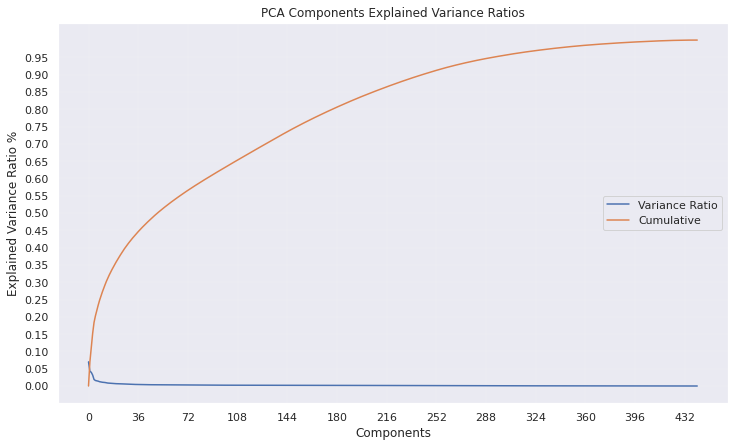

In [59]:
show_pca(pca)

Text(0, 0.5, 'PCA explained variance ratio')

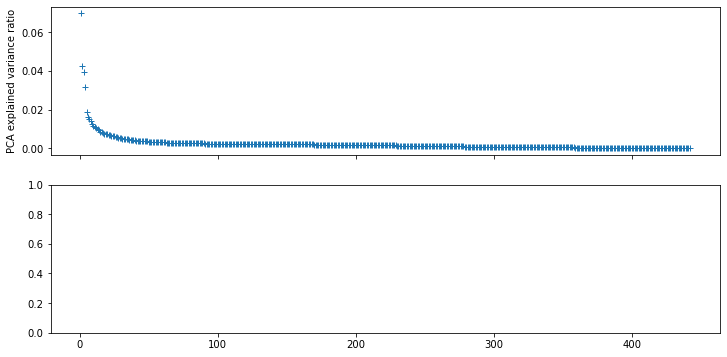

In [26]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')





MOBI_REGIO         0.1298
PLZ8_ANTG1         0.1249
KBA13_ANTG1        0.1243
MOBI_RASTER        0.1212
KBA05_ANTG1        0.1199
                    ...  
PLZ8_ANTG4        -0.1193
CAMEO_DEUG_2015   -0.1208
KBA13_ANTG4       -0.1211
PLZ8_ANTG3        -0.1242
KBA13_ANTG3       -0.1245
Name: Dimension 1, Length: 197, dtype: float64

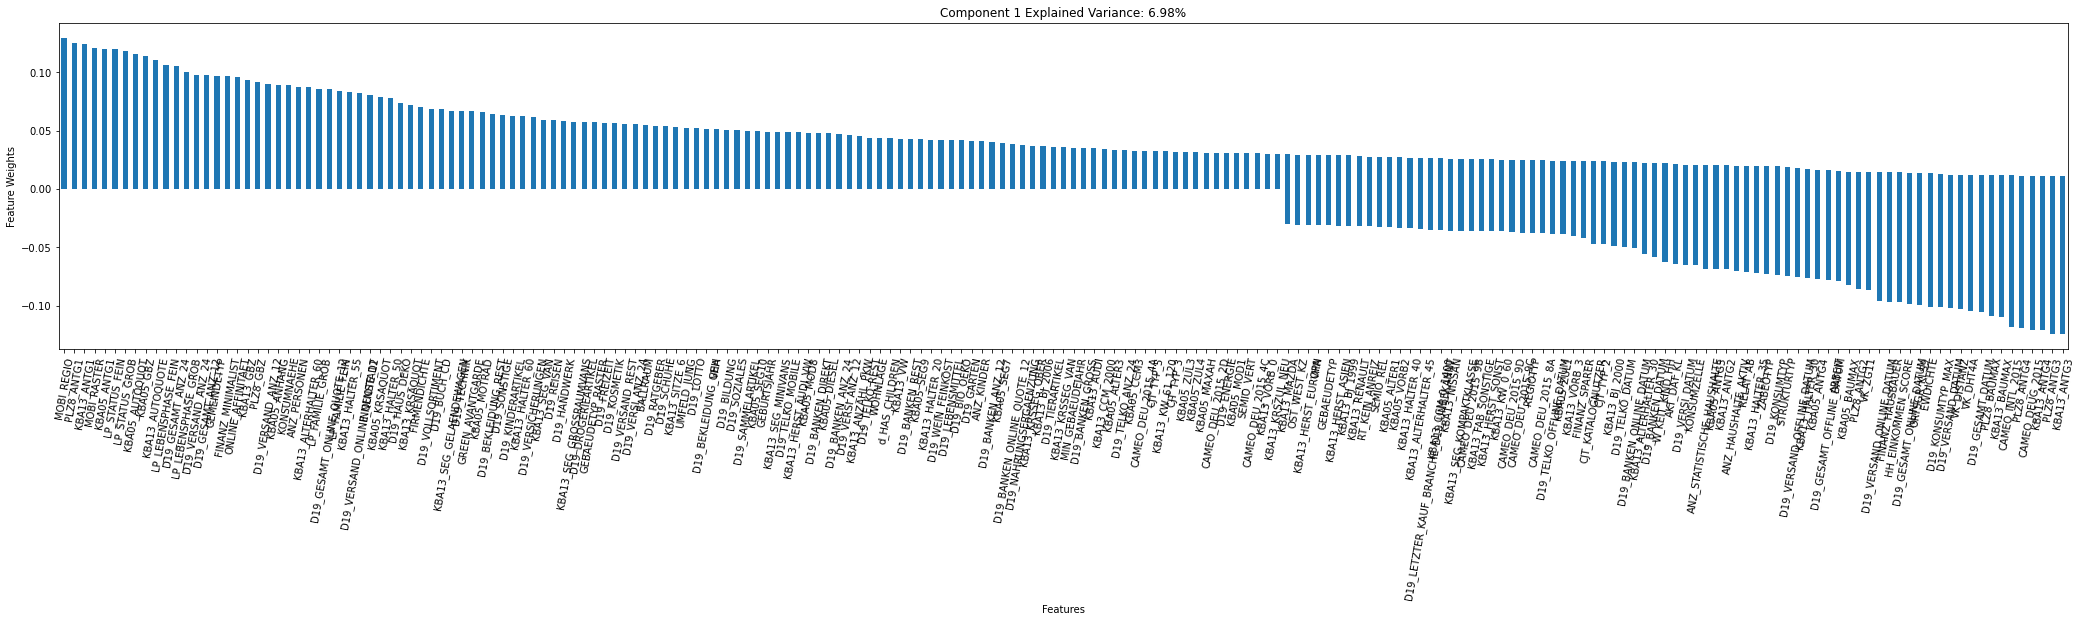

In [35]:
def pca_results(full_dataset, pca, component):
    """
    DESCRIPTION:
        Create a DataFrame of the PCA results
        Includes dimension feature weights and explained variance
        Visualizes the PCA results
    INPUT:
        full_dataset: the population or customer dataset before applying the PCA
        pca: the sklearn.decomposition.pca.PCA object (fitted)
        component (integer) : the component we want to visualize the features and weights
    OUTPUT:
    
    """

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (36,6))

    # Plot the feature weights as a function of the components
    features_to_show = components.iloc[component - 1].sort_values(ascending=False)
    features_to_show = features_to_show[np.absolute(features_to_show.values) >= 0.03]
    components.iloc[component - 1].sort_values(ascending=False).plot(ax = ax, kind = 'bar');
    features_to_show.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(list(features_to_show.keys()), rotation=80)
    ax.set_xlabel("Features")

    # Display the explained variance ratios
    #for i, ev in enumerate(pca.explained_variance_ratio_):
    ev = pca.explained_variance_ratio_[component-1]
    
    plt.title("Component {} Explained Variance: {:.2f}%".format(component, ev*100))

    return features_to_show



pca_results(X_train, pca, 1)

In [44]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df = pd.DataFrame(pca.components_, columns=list(X_train.columns))
df

,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_MOBILE,D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST,D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL,D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT,D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST,D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN,D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT,D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST,d_HAS_CHILDREN,d_HAS_CHILDREN_YTE10
0,-0.01890,-0.06446,0.02058,-0.00181,-0.00522,-0.00301,0.00017,-0.00119,-0.07007,-0.01650,...,0.00424,0.00202,0.00689,-0.03502,0.01446,0.02587,0.01990,0.00578,0.04335,0.02007
1,0.02961,-0.01143,0.10394,-0.01302,-0.01123,-0.00460,0.00083,0.10497,0.02901,-0.00161,...,0.01655,0.00679,0.00764,-0.06369,0.03362,0.02141,0.02061,0.00044,0.07223,0.04133
2,0.01867,0.00930,0.02849,-0.00510,-0.00439,-0.00138,0.00007,0.02973,0.02681,0.02644,...,0.00148,-0.00057,-0.00031,-0.01573,0.00786,-0.00422,0.00010,0.00292,0.01626,0.01091
3,-0.06198,-0.08362,-0.12320,0.01453,0.01039,0.00488,0.00109,-0.12827,0.04007,0.02537,...,0.00492,0.00643,0.00209,0.00384,-0.00047,0.01070,0.03074,0.01096,-0.02881,-0.02332
4,0.01831,0.01812,0.02032,-0.00447,-0.00168,-0.00007,-0.00022,0.03534,0.00375,0.01013,...,-0.00290,-0.00115,-0.00141,0.00122,-0.00178,-0.00499,0.00363,-0.00038,0.00358,0.00560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-0.00217,-0.01080,0.02532,0.00231,0.00040,-0.00069,-0.00020,-0.00346,-0.01014,0.00035,...,-0.00244,-0.00284,-0.00097,-0.00299,-0.00321,-0.00720,-0.00339,-0.00068,-0.02624,-0.00612
438,-0.00097,0.00283,-0.00784,0.00020,-0.00024,0.00043,-0.00011,-0.00402,0.00027,0.00200,...,0.00039,0.00062,0.00051,0.00227,0.00108,0.00144,0.00071,0.00041,0.00562,0.00284
439,0.00019,-0.00591,0.00529,0.00172,0.00044,-0.00004,-0.00001,0.00394,-0.00413,0.00007,...,-0.00103,-0.00121,-0.00063,-0.00184,-0.00105,-0.00215,-0.00181,-0.00060,0.00392,-0.00436
440,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,...,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000


D19_GESAMT_ANZ_24             0.14340
ONLINE_AFFINITAET             0.14020
D19_GESAMT_ANZ_12             0.13530
D19_VERSAND_ANZ_24            0.13120
D19_GESAMT_ONLINE_QUOTE_12    0.12470
                               ...   
CJT_TYP_4                    -0.11840
D19_VERSAND_DATUM            -0.13250
D19_GESAMT_DATUM             -0.13480
D19_VERSAND_ONLINE_DATUM     -0.13490
D19_GESAMT_ONLINE_DATUM      -0.13960
Name: Dimension 2, Length: 225, dtype: float64

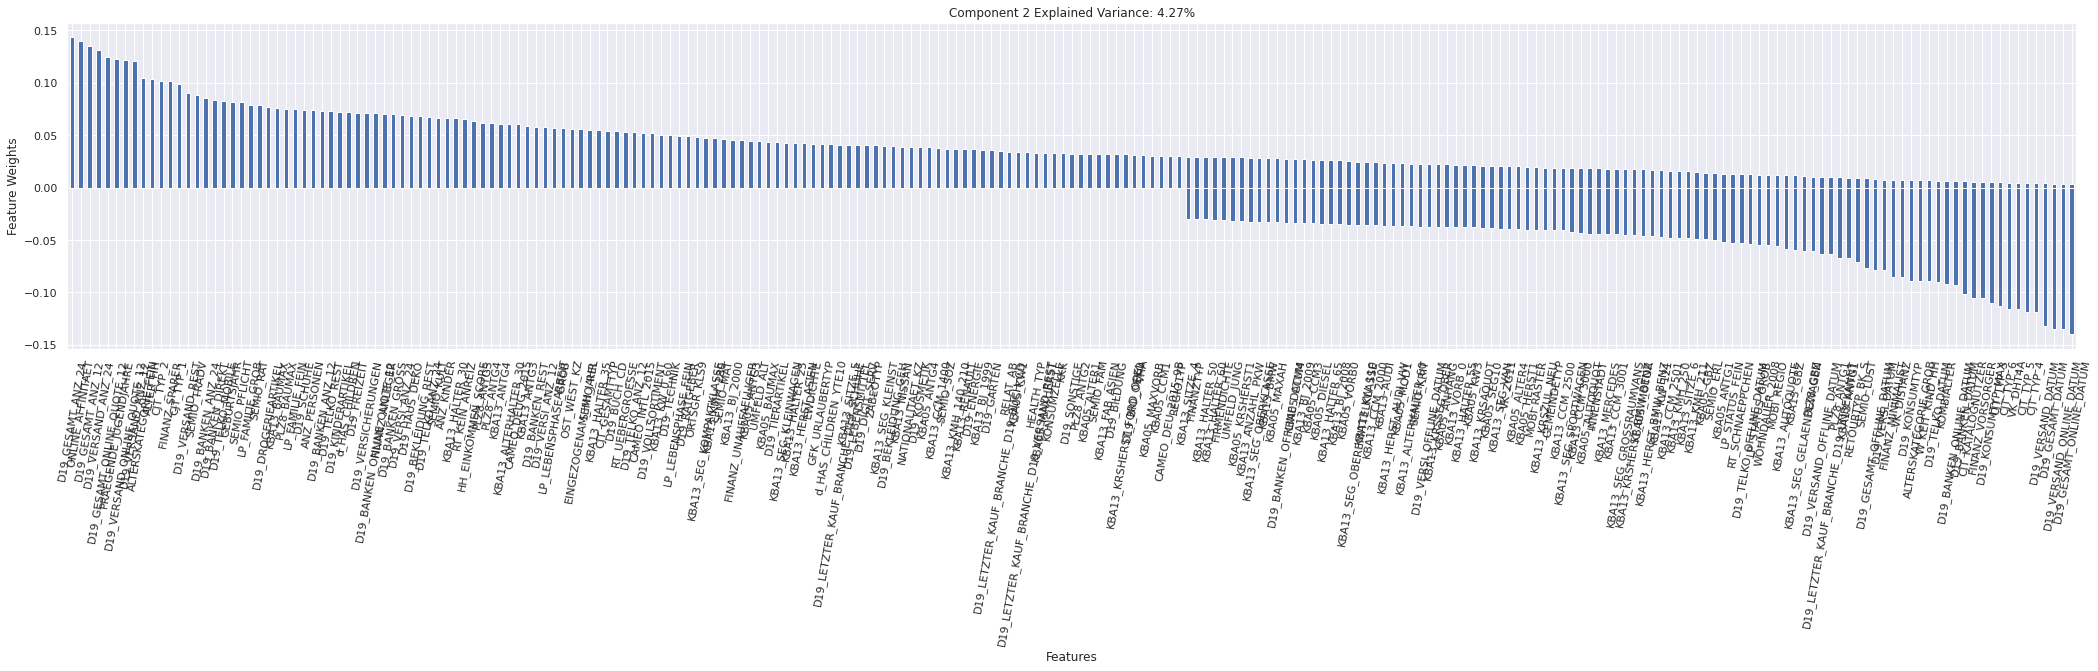

In [68]:
pca_results(X_train, pca, 2)

KBA13_HERST_BMW_BENZ           0.18120
KBA13_SEG_OBEREMITTELKLASSE    0.15610
KBA13_MERCEDES                 0.15390
KBA13_BMW                      0.15220
KBA13_SITZE_4                  0.14590
                                ...   
KBA13_HALTER_25               -0.11700
KBA13_HALTER_20               -0.11730
KBA13_SEG_KLEINWAGEN          -0.12830
KBA13_KMH_140_210             -0.12850
KBA13_SITZE_5                 -0.14850
Name: Dimension 3, Length: 177, dtype: float64

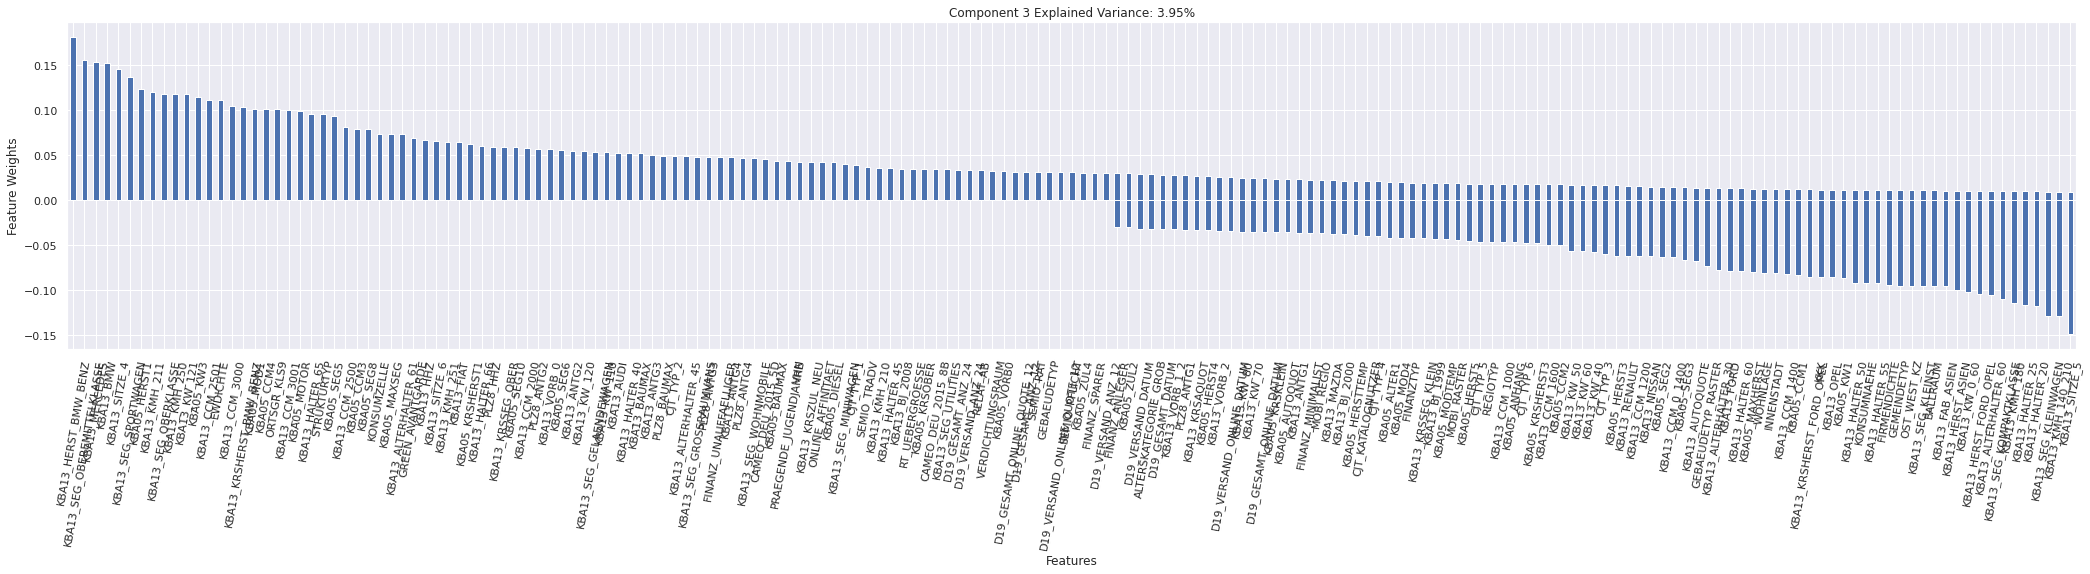

In [69]:
pca_results(X_train, pca, 3)

# Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [ ]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')